[View in Colaboratory](https://colab.research.google.com/github/sesengurbuz/reuters/blob/master/reuters.ipynb)

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)


8982

In [3]:
len(test_data)


2246

In [4]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [28]:
decoded_newswire


'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [30]:
train_labels[1000]


19

In [35]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

print (train_data[0])
print (x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[0. 1. 1. ... 0. 0. 0.]


In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 156us/step - loss: 2.5311 - acc: 0.4957 - val_loss: 1.7197 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.4451 - acc: 0.6893 - val_loss: 1.3453 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.0955 - acc: 0.7651 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8704 - acc: 0.8152 - val_loss: 1.0787 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.7045 - acc: 0.8479 - val_loss: 0.9856 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.5688 - acc: 0.8791 - val_loss: 0.9411 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.4617 - acc: 0.9032 - val_loss: 0.9092 - val_acc: 0.8000


7982/7982 [==============================] - 1s 151us/step - loss: 0.3056 - acc: 0.9307 - val_loss: 0.8937 - val_acc: 0.8060
Epoch 10/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.2558 - acc: 0.9411 - val_loss: 0.9073 - val_acc: 0.8090
Epoch 11/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.2198 - acc: 0.9476 - val_loss: 0.9154 - val_acc: 0.8130
Epoch 12/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.1882 - acc: 0.9500 - val_loss: 0.9060 - val_acc: 0.8140
Epoch 13/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.1708 - acc: 0.9525 - val_loss: 0.9342 - val_acc: 0.8100
Epoch 14/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.1540 - acc: 0.9550 - val_loss: 0.9692 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.1396 - acc: 0.9560 - val_loss: 0.9722 - val_acc: 0.8120
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 155us/step - loss: 0.1199 - acc: 0.9578 - val_loss: 1.0448 - val_acc: 0.8050
Epoch 19/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.1140 - acc: 0.9594 - val_loss: 1.1018 - val_acc: 0.7970
Epoch 20/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.1115 - acc: 0.9597 - val_loss: 1.0748 - val_acc: 0.8000


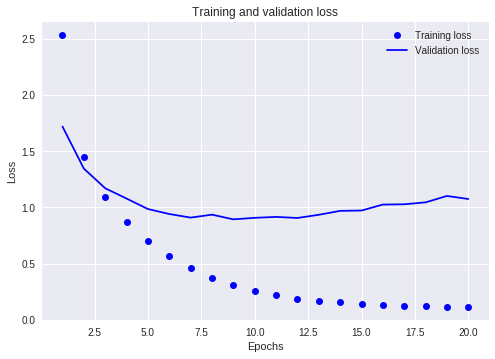

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

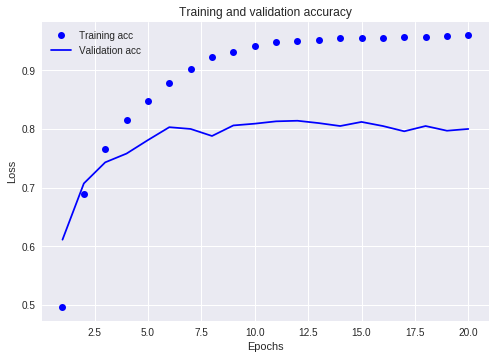

In [16]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 161us/step - loss: 2.6125 - acc: 0.5085 - val_loss: 1.7083 - val_acc: 0.6310
Epoch 2/8
7982/7982 [==============================] - 1s 145us/step - loss: 1.4248 - acc: 0.7016 - val_loss: 1.3091 - val_acc: 0.7130
Epoch 3/8
7982/7982 [==============================] - 1s 158us/step - loss: 1.0707 - acc: 0.7734 - val_loss: 1.1298 - val_acc: 0.7670
Epoch 4/8
7982/7982 [==============================] - 1s 155us/step - loss: 0.8396 - acc: 0.8265 - val_loss: 1.0302 - val_acc: 0.7850
Epoch 5/8
7982/7982 [==============================] - 1s 157us/step - loss: 0.6672 - acc: 0.8622 - val_loss: 0.9701 - val_acc: 0.7990
Epoch 6/8
7982/7982 [==============================] - 1s 158us/step - loss: 0.5294 - acc: 0.8913 - val_loss: 0.9234 - val_acc: 0.8130
Epoch 7/8
7982/7982 [==============================] - 1s 155us/step - loss: 0.4266 - acc: 0.9134 - val_loss: 0.9011 - val_acc: 0.8130
Epoch 8

In [39]:
results

[0.9831632582714593, 0.7853962600178095]

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19679430097951914

In [0]:
predictions = model.predict(x_test)


In [42]:
predictions[0].shape
predictions[0]

array([3.4133558e-05, 8.5929838e-05, 6.9219968e-05, 7.2604752e-01,
       2.5296250e-01, 1.9293239e-07, 1.4771236e-04, 6.9460672e-05,
       8.2498705e-03, 1.2395031e-05, 5.6721241e-05, 3.1260927e-03,
       3.7917078e-05, 1.7343380e-04, 6.0336934e-06, 3.1433432e-05,
       8.8259415e-04, 4.5740217e-04, 4.8515093e-04, 1.0799773e-03,
       1.7895248e-03, 6.5060006e-04, 7.8725880e-06, 3.2261282e-04,
       1.3628360e-05, 1.9911665e-04, 9.6585281e-06, 3.3347878e-05,
       1.6578511e-05, 1.8953171e-04, 6.4629200e-04, 5.8438448e-04,
       1.9783738e-05, 3.7450463e-05, 9.2566057e-05, 3.9258681e-05,
       7.3430332e-05, 7.8807047e-05, 1.2693915e-04, 3.9471485e-04,
       6.3004765e-05, 4.9250555e-04, 2.5390023e-06, 7.4260272e-05,
       1.0596342e-05, 1.5368043e-05], dtype=float32)

In [22]:
np.sum(predictions[0])


1.0

In [23]:
np.argmax(predictions[0])


3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 219us/step - loss: 2.7077 - acc: 0.4406 - val_loss: 2.0160 - val_acc: 0.5930
Epoch 2/20
7982/7982 [==============================] - 2s 198us/step - loss: 1.7341 - acc: 0.6185 - val_loss: 1.6580 - val_acc: 0.6110
Epoch 3/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.4676 - acc: 0.6363 - val_loss: 1.5682 - val_acc: 0.6080
Epoch 4/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.3270 - acc: 0.6436 - val_loss: 1.4825 - val_acc: 0.6170
Epoch 5/20
7982/7982 [==============================] - 2s 195us/step - loss: 1.2176 - acc: 0.6505 - val_loss: 1.4538 - val_acc: 0.6210
Epoch 6/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.1279 - acc: 0.6745 - val_loss: 1.4368 - val_acc: 0.6310
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.0537 - acc: 0.6941 - val_loss: 1.4498 - val_acc: 0.6350


7982/7982 [==============================] - 2s 199us/step - loss: 0.9935 - acc: 0.7043 - val_loss: 1.4396 - val_acc: 0.6500
Epoch 9/20
7982/7982 [==============================] - 2s 202us/step - loss: 0.9433 - acc: 0.7166 - val_loss: 1.4862 - val_acc: 0.6500
Epoch 10/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.9002 - acc: 0.7430 - val_loss: 1.5159 - val_acc: 0.6540
Epoch 11/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.8623 - acc: 0.7552 - val_loss: 1.5034 - val_acc: 0.6660
Epoch 12/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.8279 - acc: 0.7626 - val_loss: 1.5234 - val_acc: 0.6720
Epoch 13/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.7981 - acc: 0.7720 - val_loss: 1.5421 - val_acc: 0.6690
Epoch 14/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.7717 - acc: 0.7819 - val_loss: 1.5896 - val_acc: 0.6680
Epoch 15/20
4480/7982 [===============>..............]

7982/7982 [==============================] - 2s 196us/step - loss: 0.7464 - acc: 0.7917 - val_loss: 1.6377 - val_acc: 0.6680
Epoch 16/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.7224 - acc: 0.7970 - val_loss: 1.7117 - val_acc: 0.6690
Epoch 17/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.7047 - acc: 0.8051 - val_loss: 1.7349 - val_acc: 0.6660
Epoch 18/20
7982/7982 [==============================] - 2s 202us/step - loss: 0.6851 - acc: 0.8074 - val_loss: 1.7754 - val_acc: 0.6740
Epoch 19/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.6678 - acc: 0.8096 - val_loss: 1.7990 - val_acc: 0.6800
Epoch 20/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.6521 - acc: 0.8158 - val_loss: 1.8239 - val_acc: 0.6690
